# Loan Analysis Problem Statement

For this project we will be analyzing `LendingClub` data from [Kaggle](https://www.kaggle.com/datasets/wordsforthewise/lending-club?datasetId=902&sortBy=voteCount).

## Introduction

`LendingClub` is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. `LendingClub` is the world's largest peer-to-peer lending platform.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

We work for the `LendingClub` company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:
 1. `Loan accepted`: If the company approves the loan, there are 3 possible scenarios described below:
    - `Fully paid`: Applicant has fully paid the loan (the principal and the interest rate)
    - `Current`: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - `Charged-off`: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
 2. `Loan rejected`: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
 - `LendingClub` is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 - Like most other lending companies, lending loans to ‘`risky`’ applicants is the largest source of financial loss (called `credit loss`). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as '`charged-off`' are the '`defaulters`'. 
 - If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA and machine learning is the aim of this case study. 
 - In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 
 - To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

## Data Description

----
-----
Here is the information on this particular data set:

|List  | __LoanStatNew__ | __Description__ |
| :- | -: | :-: |
|0| loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
|1|term|The number of payments on the loan. Values are in months and can be either 36 or 60.
|2|int_rate|Interest Rate on the loan
|3|installment|The monthly payment owed by the borrower if the loan originates.
|4|grade|LC assigned loan grade
|5|sub_grade|LC assigned loan subgrade
|6|emp_title|The job title supplied by the Borrower when applying for the loan.*
|7|emp_length|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
|8|home_ownership|The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
|9|annual_inc|The self-reported annual income provided by the borrower during registration.
|10|verification_status|Indicates if income was verified by LC, not verified, or if the income source was verified
|11|issue_d|the month which the loan was funded
|12|loan_status|Current status of the loan
|13|purpose|A category provided by the borrower for the loan request.
|14|title|The loan title provided by the borrower
|15|zip_code|The first 3 numbers of the zip code provided by the borrower in the loan application.
|16|addr_state|The state provided by the borrower in the loan application
|17|dti|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
|18|earliest_cr_line|The month the borrower's earliest reported credit line was opened
|19|open_acc|The number of open credit lines in the borrower's credit file.
|20|pub_rec|Number of derogatory public records
|21|revol_bal|Total credit revolving balance
|22|revol_util|Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
|23|total_acc|The total number of credit lines currently in the borrower's credit file
|24|initial_list_status|The initial listing status of the loan. Possible values are – W, F
|25|application_type|Indicates whether the loan is an individual application or a joint application with two co-borrowers
|26|mort_acc|Number of mortgage accounts.
|27|pub_rec_bankruptcies|Number of public record bankruptcies


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
#import tensorflow as tf
%matplotlib inline
import sys

from sklearn.model_selection import train_test_split#, RandomizedSearchCV
#from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report#, roc_auc_score, roc_curve, auc
#from scikitplot.metrics import plot_confusion_matrix, plot_roc_curve

from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import AUC


In [24]:
sys.path.append("..")
df_org = pd.read_pickle("../data/interim/df.pkl")
df_org.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


___
___
___
# Exploratory Data Analysis
__Overall Goal:__
- Get an understanding for which variables are important, view summary statistics, and visualize the data

In [25]:
df_org.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174


In [26]:
df = df_org
df_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

<Axes: >

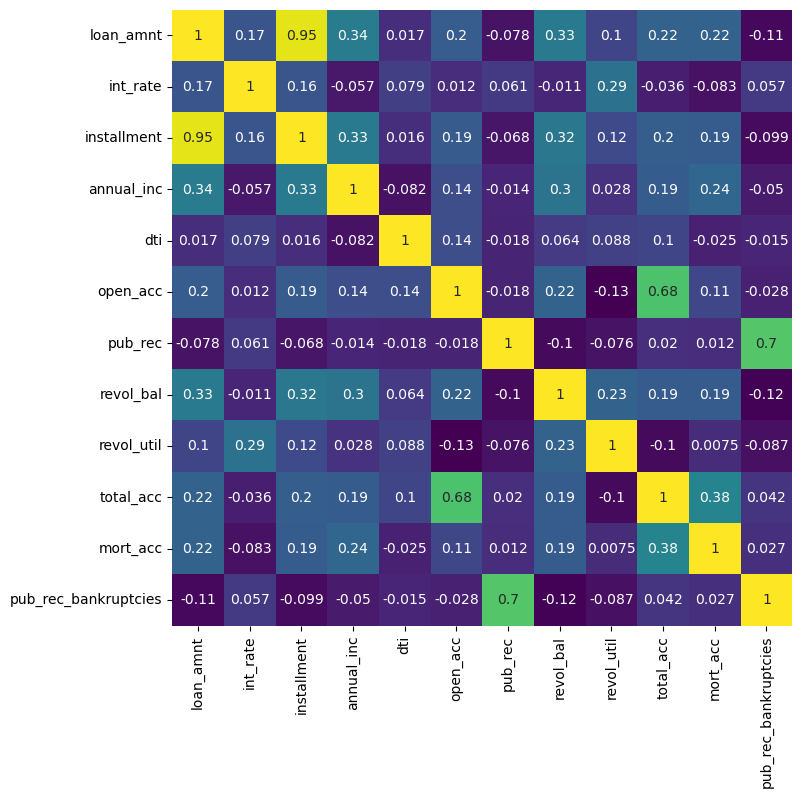

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis", cbar=False)


### Notice
There is a perfect correlation betweenn `loan_amnt`and `installment` which makes sense. Since installment is a friction of loan and the interest rate. 


___
##  `loan_status`
Current status of the loan

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Loan Status Counts')]

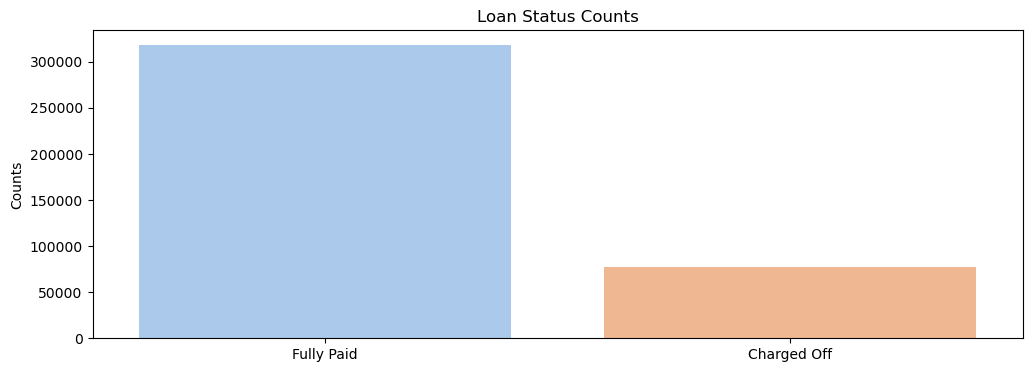

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))

fig = sns.countplot(data=df, x="loan_status", palette="pastel")
fig.set(xlabel="", ylabel="Counts", title="Loan Status Counts")




____
## `loan_amnt` & `installment` 
 - `installment`: The monthly payment owed by the borrower if the loan originates.
 - `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some 

[Text(0.5, 0, 'Installment'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Installment by Loan Status')]

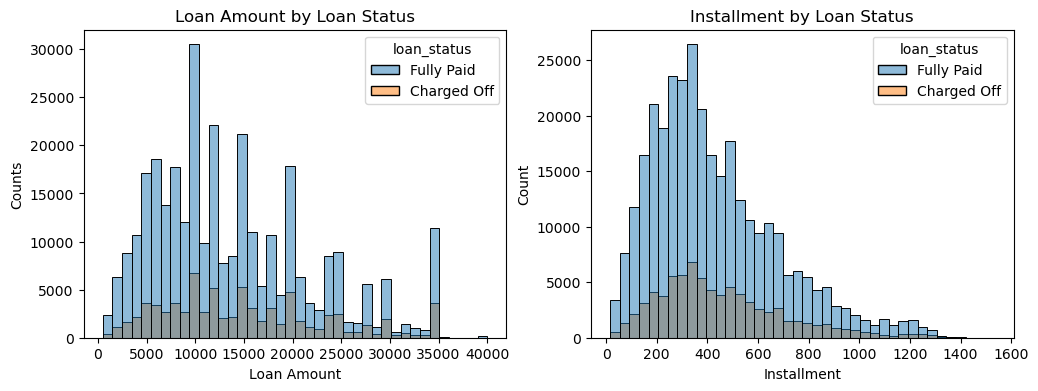

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig_bar1 = sns.histplot(df, x="loan_amnt", hue="loan_status", ax=axes[0], bins=40)
fig_bar1.set(xlabel="Loan Amount", ylabel="Counts", title="Loan Amount by Loan Status")

fig_bar2 = sns.histplot(df, x="installment", hue="loan_status", ax=axes[1], bins=40)
fig_bar2.set(xlabel="Installment", ylabel="Count", title="Installment by Loan Status")


[Text(0.5, 1.0, 'Loan Status by Installment'),
 Text(0.5, 0, 'Loan Status'),
 Text(0, 0.5, 'Installment')]

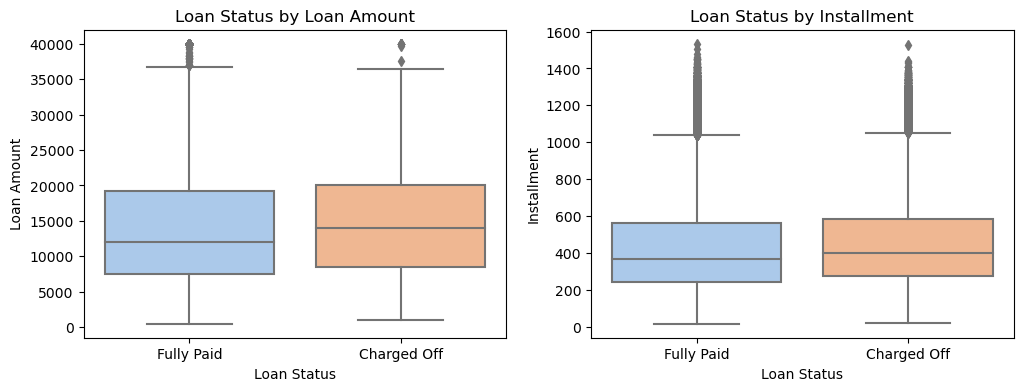

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig1 = sns.boxplot(
    data=df, x="loan_status", y="loan_amnt", palette="pastel", ax=axes[0]
)
fig1.set(title="Loan Status by Loan Amount", xlabel="Loan Status", ylabel="Loan Amount")

fig2 = sns.boxplot(
    data=df, x="loan_status", y="installment", palette="pastel", ax=axes[1]
)
fig2.set(title="Loan Status by Installment", xlabel="Loan Status", ylabel="Installment")



___
## `grade` & `sub_grade`

 - `grade`LC assigned loan grade
 - `sub_grade`	LC assigned loan subgrade

In [31]:
print(f"Grade unique values: {np.sort(df.grade.unique())}")
print("\n")
print(f"Sub_Grade unique values: {np.sort(df.sub_grade.unique())}")


Grade unique values: ['A' 'B' 'C' 'D' 'E' 'F' 'G']


Sub_Grade unique values: ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


[Text(0.5, 1.0, 'Loan Status by Grade'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Grades')]

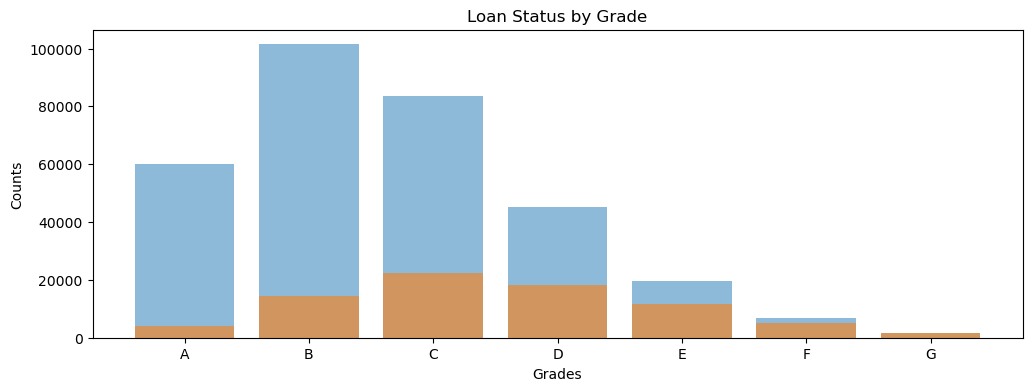

In [32]:
fig, ax = plt.subplots(figsize=(12, 4))

fullyPaid = df.loc[df.loan_status == "Fully Paid", "grade"].value_counts().sort_index()
chargedOff = (
    df.loc[df.loan_status == "Charged Off", "grade"].value_counts().sort_index()
)


ax.bar(x=fullyPaid.index, height=fullyPaid.values, alpha=0.5)
ax.bar(x=chargedOff.index, height=chargedOff.values, alpha=0.6)
ax.set(title="Loan Status by Grade", ylabel="Counts", xlabel="Grades")


[Text(0.5, 1.0, 'Loan Status by Sub Grade'),
 Text(0.5, 0, 'Sub Grade'),
 Text(0, 0.5, 'Counts')]

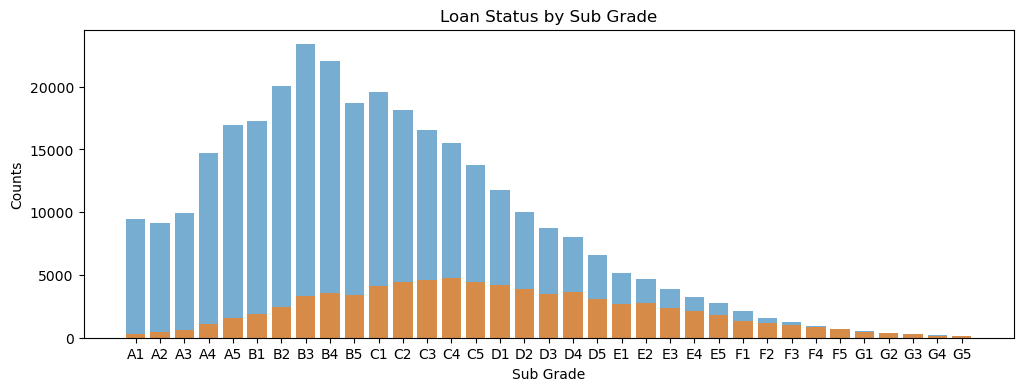

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))

fullyPaid = (
    df.loc[df.loan_status == "Fully Paid", "sub_grade"].value_counts().sort_index()
)
chargedOff = (
    df.loc[df.loan_status == "Charged Off", "sub_grade"].value_counts().sort_index()
)

ax.bar(fullyPaid.index, fullyPaid.values, alpha=0.6)
ax.bar(chargedOff.index, chargedOff.values, alpha=0.7)
ax.set(title="Loan Status by Sub Grade", xlabel="Sub Grade", ylabel="Counts")



___
## `int_rate` & `annual_inc`
 - `int_rate`: Interest Rate on the loan
 - `annual_inc`: The self-reported annual income provided by the borrower during registration

[Text(0.5, 1.0, 'Loan Status by Interest Rate'),
 Text(0.5, 0, 'Interest Rate'),
 Text(0, 0.5, 'Counts')]

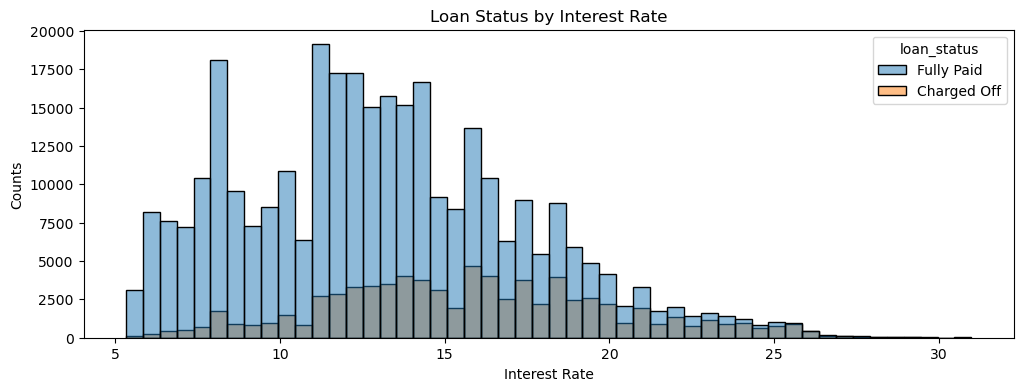

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(df, x="int_rate", bins=50, hue="loan_status")
ax.set(title="Loan Status by Interest Rate", xlabel="Interest Rate", ylabel="Counts")


(0.0, 300000.0)

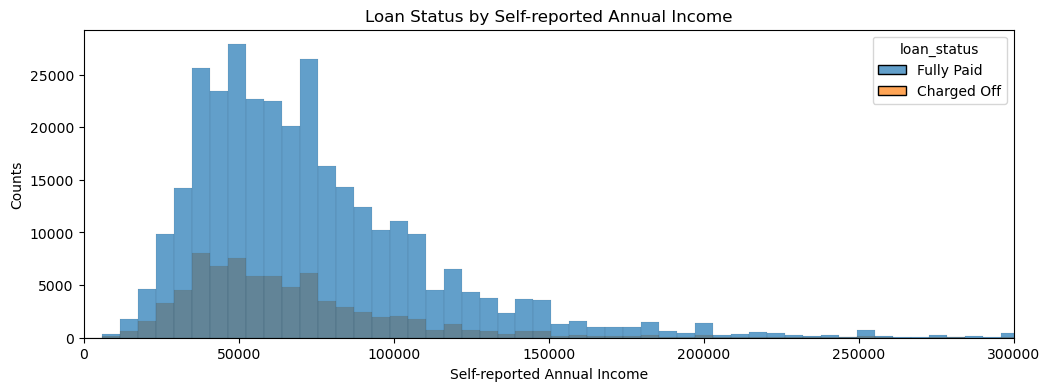

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(df, x="annual_inc", bins=1500, hue="loan_status", alpha=0.7)
ax.set(
    title="Loan Status by Self-reported Annual Income",
    xlabel="Self-reported Annual Income",
    ylabel="Counts",
)
ax.set_xlim(0, 300000)



___
## `issue_d` & `earliest_cr_line`
- `issue_d` The month which the loan was funded
- `earliest_cr_line` The month the borrower's earliest reported credit line was opened

[Text(0.5, 1.0, 'Loan Status by The Earliest Reported Credit'),
 Text(0.5, 0, 'The Earliest Reported Credit'),
 Text(0, 0.5, 'Counts')]

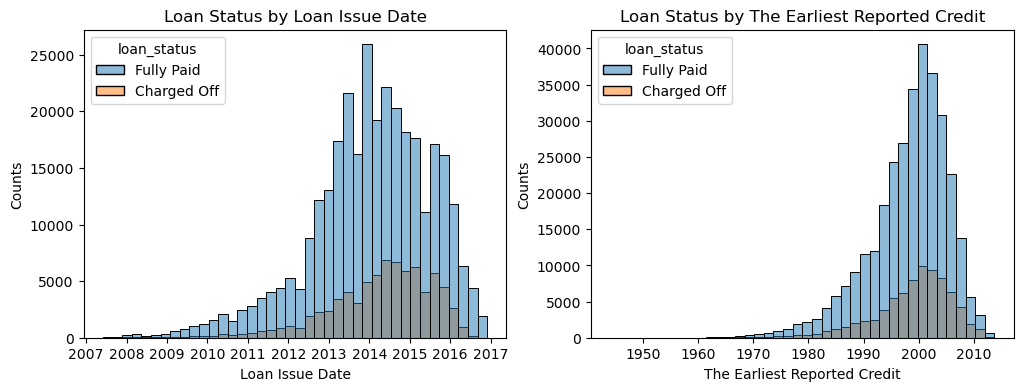

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0] = sns.histplot(df, x="issue_d", hue="loan_status", bins=40, ax=axes[0])
axes[0].set(
    title="Loan Status by Loan Issue Date", xlabel="Loan Issue Date", ylabel="Counts"
)

axes[1] = sns.histplot(df, x="earliest_cr_line", hue="loan_status", bins=40, ax=axes[1])
axes[1].set(
    title="Loan Status by The Earliest Reported Credit",
    xlabel="The Earliest Reported Credit",
    ylabel="Counts",
)



___
## `dti`, `total_acc`, `revol_bal` and `revol_util`
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [37]:
df["dti"].value_counts().sort_values()


dti
55.53      1
40.99      1
40.13      1
43.65      1
47.09      1
        ... 
18.00    300
16.80    301
19.20    302
14.40    310
0.00     313
Name: count, Length: 4262, dtype: int64

(0.0, 50.0)

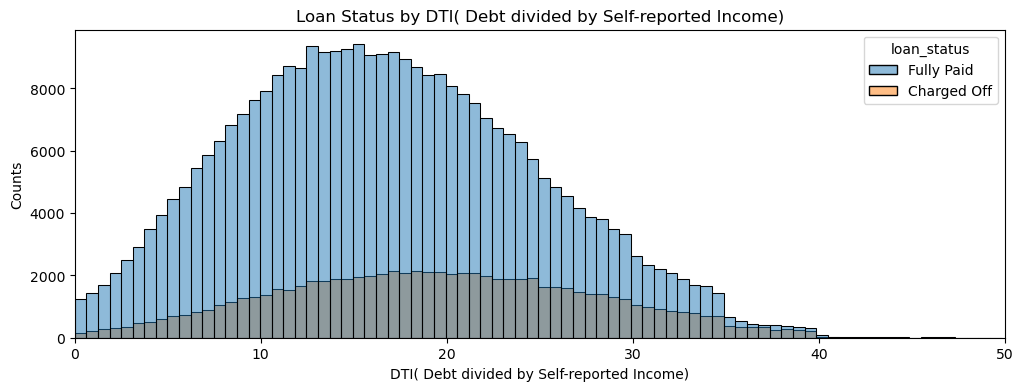

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))

df_dti = df[df["dti"] <= 50]
sns.histplot(df_dti, x="dti", hue="loan_status", bins=80)

ax.set(
    title="Loan Status by DTI( Debt divided by Self-reported Income)",
    xlabel="DTI( Debt divided by Self-reported Income)",
    ylabel="Counts",
)
ax.set_xlim(0, 50)


[Text(0.5, 1.0, 'Loan Status by revol_bal')]

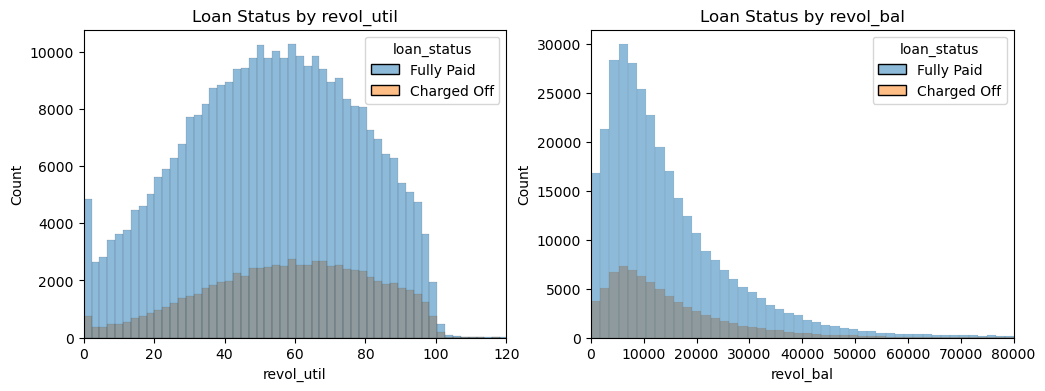

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0] = sns.histplot(df, x="revol_util", hue="loan_status", bins=400, ax=axes[0])
axes[0].set_xlim(0, 120)
axes[0].set(title="Loan Status by revol_util")

axes[1] = sns.histplot(df, x="revol_bal", hue="loan_status", bins=1000)
axes[1].set_xlim(0, 80000)
axes[1].set(title="Loan Status by revol_bal")


Text(0.5, 1.0, 'Loan Status by The total number of credit lines ')

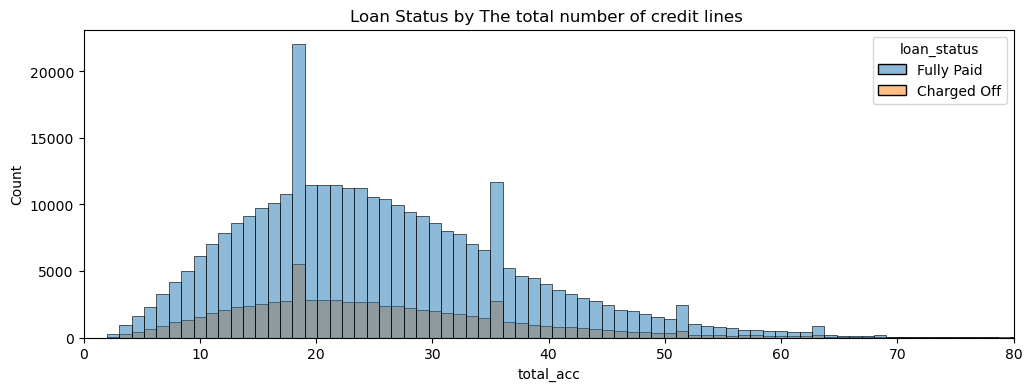

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.histplot(df, x="total_acc", hue="loan_status", bins=140)
ax.set_xlim(0, 80)
ax.set_title("Loan Status by The total number of credit lines ")



___
## `pub_rec`, `mort_acc`, `pub_rec_bankruptcies` and `open_acc`
- `pub_rec`The number of derogatory public records
- `mort_acc`The number of mortgage accounts
- `open_acc`The number of open credit lines in the borrower's credit file.
- `pub_rec_bankruptcies`The number of public record bankruptcies

[Text(0.5, 1.0, 'Loan Status by The number of public record bankruptcies'),
 Text(0.5, 0, 'pub_rec_bankruptcies'),
 Text(0, 0.5, 'Counts')]

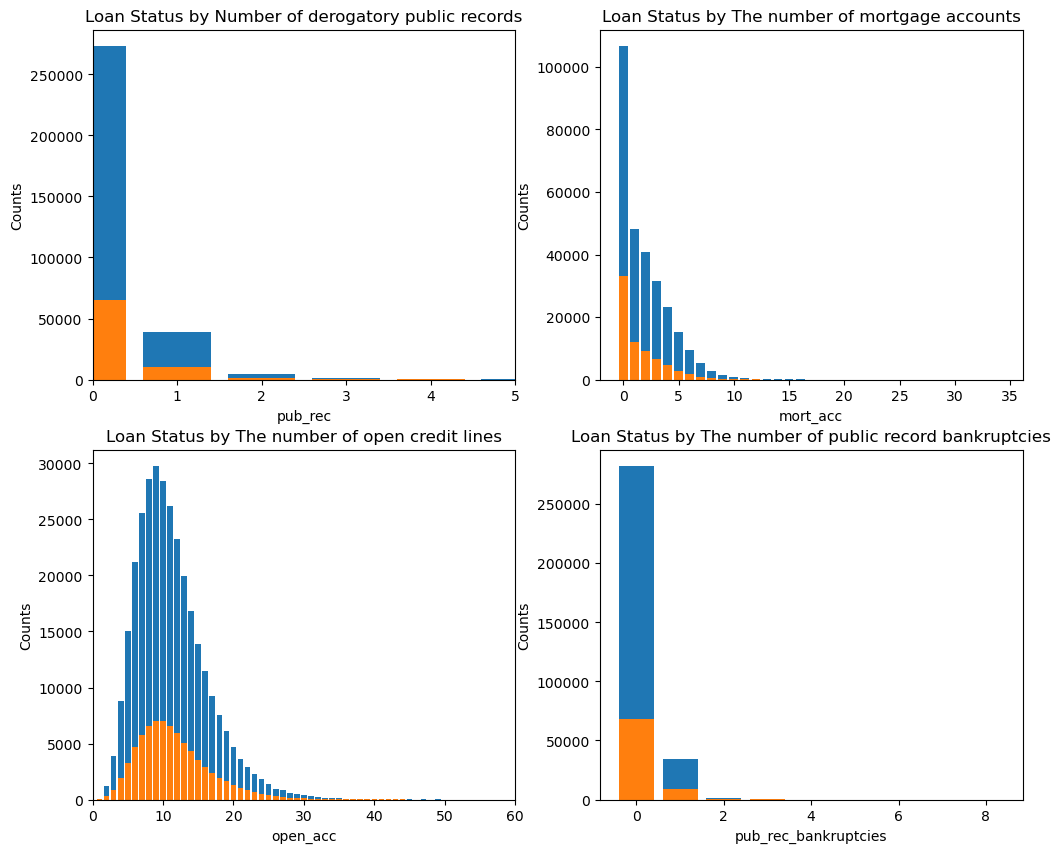

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


fullyPaid1 = df.loc[df["loan_status"] == "Fully Paid", "pub_rec"].value_counts()
chargedOff1 = df.loc[df["loan_status"] == "Charged Off", "pub_rec"].value_counts()

axes[0, 0].bar(x=fullyPaid1.index, height=fullyPaid1.values)
axes[0, 0].bar(x=chargedOff1.index, height=chargedOff1.values)
axes[0, 0].set_xlim(0, 5)
axes[0, 0].set(
    title="Loan Status by Number of derogatory public records",
    xlabel="pub_rec",
    ylabel="Counts",
)


fullyPaid2 = df.loc[df["loan_status"] == "Fully Paid", "mort_acc"].value_counts()
chargedOff2 = df.loc[df["loan_status"] == "Charged Off", "mort_acc"].value_counts()

axes[0, 1].bar(x=fullyPaid2.index, height=fullyPaid2.values)
axes[0, 1].bar(x=chargedOff2.index, height=chargedOff2.values)
axes[0, 1].set(
    title="Loan Status by The number of mortgage accounts",
    xlabel="mort_acc",
    ylabel="Counts",
)


fullyPaid3 = df.loc[df["loan_status"] == "Fully Paid", "open_acc"].value_counts()
chargedOff3 = df.loc[df["loan_status"] == "Charged Off", "open_acc"].value_counts()

axes[1, 0].bar(x=fullyPaid3.index, height=fullyPaid3.values)
axes[1, 0].bar(x=chargedOff3.index, height=chargedOff3.values)
axes[1, 0].set_xlim(0, 60)
axes[1, 0].set(
    title="Loan Status by The number of open credit lines",
    xlabel="open_acc",
    ylabel="Counts",
)


fullyPaid4 = df.loc[
    df["loan_status"] == "Fully Paid", "pub_rec_bankruptcies"
].value_counts()
chargedOff4 = df.loc[
    df["loan_status"] == "Charged Off", "pub_rec_bankruptcies"
].value_counts()

axes[1, 1].bar(x=fullyPaid4.index, height=fullyPaid4.values)
axes[1, 1].bar(x=chargedOff4.index, height=chargedOff4.values)
axes[1, 1].set(
    title="Loan Status by The number of public record bankruptcies",
    xlabel="pub_rec_bankruptcies",
    ylabel="Counts",
)



___
## `purpose` and `title`
- `purpose`	A category provided by the borrower for the loan request
- `title`	The loan title provided by the borrower

In [42]:
df.purpose.value_counts().sort_values(ascending=False)


purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [43]:
df.title.value_counts().sort_values(ascending=False)


title
Debt consolidation                     152472
Credit card refinancing                 51487
Home improvement                        15264
Other                                   12930
Debt Consolidation                      11608
                                        ...  
Manage Money                                1
C-Card Refinance                            1
Stable borrower getting out of debt         1
Get out of Debt quick                       1
Toxic Debt Payoff                           1
Name: count, Length: 48816, dtype: int64

In [44]:
df.title.nunique()


48816

__Notice__ : we can remove `title` column, since theb most part of `purpose` and `title` columns are the same. Also it seems `purpose` can explian the reason better than `title`


___
## `verification_status`, `home_ownership`, `application_type` and `term`
- `verification_status`Indicates if income was verified by LC, not verified, or if the income source was verified
- `home_ownership`The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- `application_type`Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `term`The number of payments on the loan. Values are in months and can be either 36 or 60.

[Text(0.5, 1.0, 'Loan Status by The Number of Payments on The Loan'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'term')]

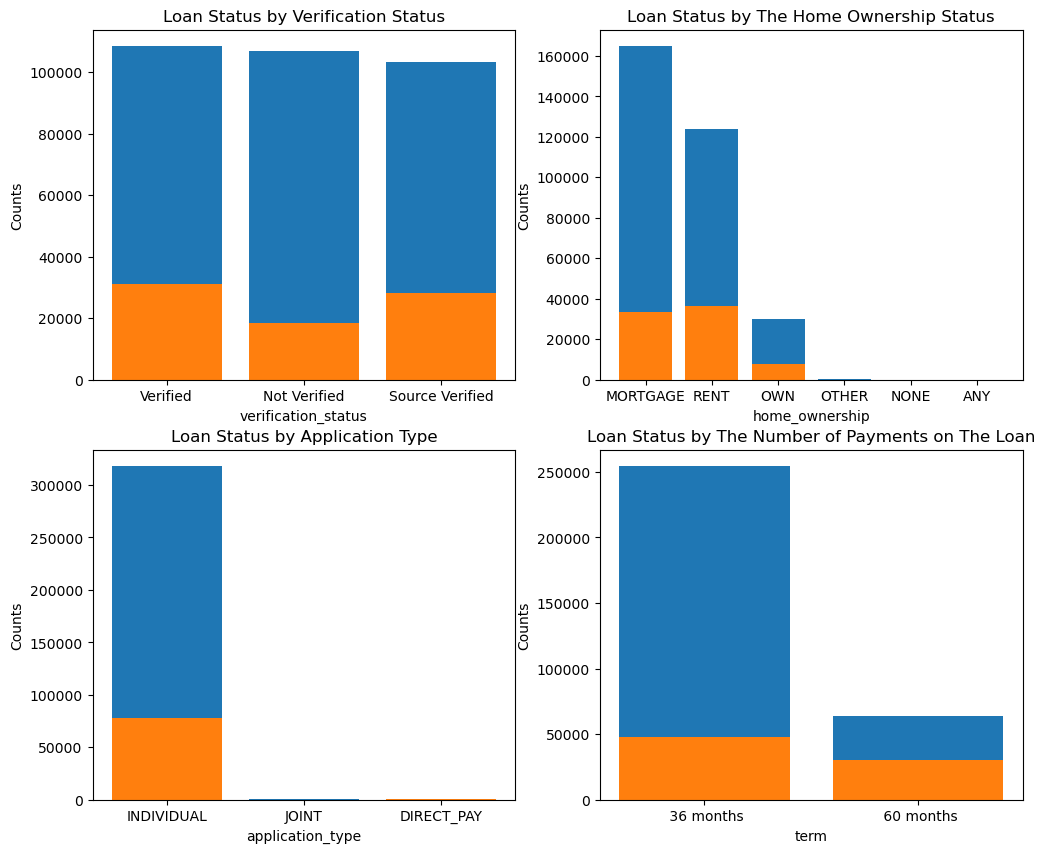

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

fullyPaid1 = df.loc[
    df["loan_status"] == "Fully Paid", "verification_status"
].value_counts()
chargedOff1 = df.loc[
    df["loan_status"] == "Charged Off", "verification_status"
].value_counts()

ax[0, 0].bar(x=fullyPaid1.index, height=fullyPaid1.values)
ax[0, 0].bar(x=chargedOff1.index, height=chargedOff1.values)
ax[0, 0].set(
    title="Loan Status by Verification Status",
    ylabel="Counts",
    xlabel="verification_status",
)


fullyPaid2 = df.loc[df["loan_status"] == "Fully Paid", "home_ownership"].value_counts()
chargedOff2 = df.loc[
    df["loan_status"] == "Charged Off", "home_ownership"
].value_counts()

ax[0, 1].bar(x=fullyPaid2.index, height=fullyPaid2.values)
ax[0, 1].bar(x=chargedOff2.index, height=chargedOff2.values)
ax[0, 1].set(
    title="Loan Status by The Home Ownership Status",
    ylabel="Counts",
    xlabel="home_ownership",
)


fullyPaid3 = df.loc[
    df["loan_status"] == "Fully Paid", "application_type"
].value_counts()
chargedOff3 = df.loc[
    df["loan_status"] == "Charged Off", "application_type"
].value_counts()

ax[1, 0].bar(x=fullyPaid3.index, height=fullyPaid3.values)
ax[1, 0].bar(x=chargedOff3.index, height=chargedOff3.values)
ax[1, 0].set(
    title="Loan Status by Application Type", ylabel="Counts", xlabel="application_type"
)


fullyPaid4 = df.loc[df["loan_status"] == "Fully Paid", "term"].value_counts()
chargedOff4 = df.loc[df["loan_status"] == "Charged Off", "term"].value_counts()

ax[1, 1].bar(x=fullyPaid4.index, height=fullyPaid4.values)
ax[1, 1].bar(x=chargedOff4.index, height=chargedOff4.values)
ax[1, 1].set(
    title="Loan Status by The Number of Payments on The Loan",
    ylabel="Counts",
    xlabel="term",
)



___
### `emp_title`, `emp_length` and  `initial_list_status`
- `emp_title` The job title supplied by the Borrower when applying for the loan.*
- `emp_length`Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- `initial_list_status`The initial listing status of the loan. Possible values are – W, F

[Text(0.5, 1.0, 'Loan Status by The initial listing status of the loan'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'initial_list_status')]

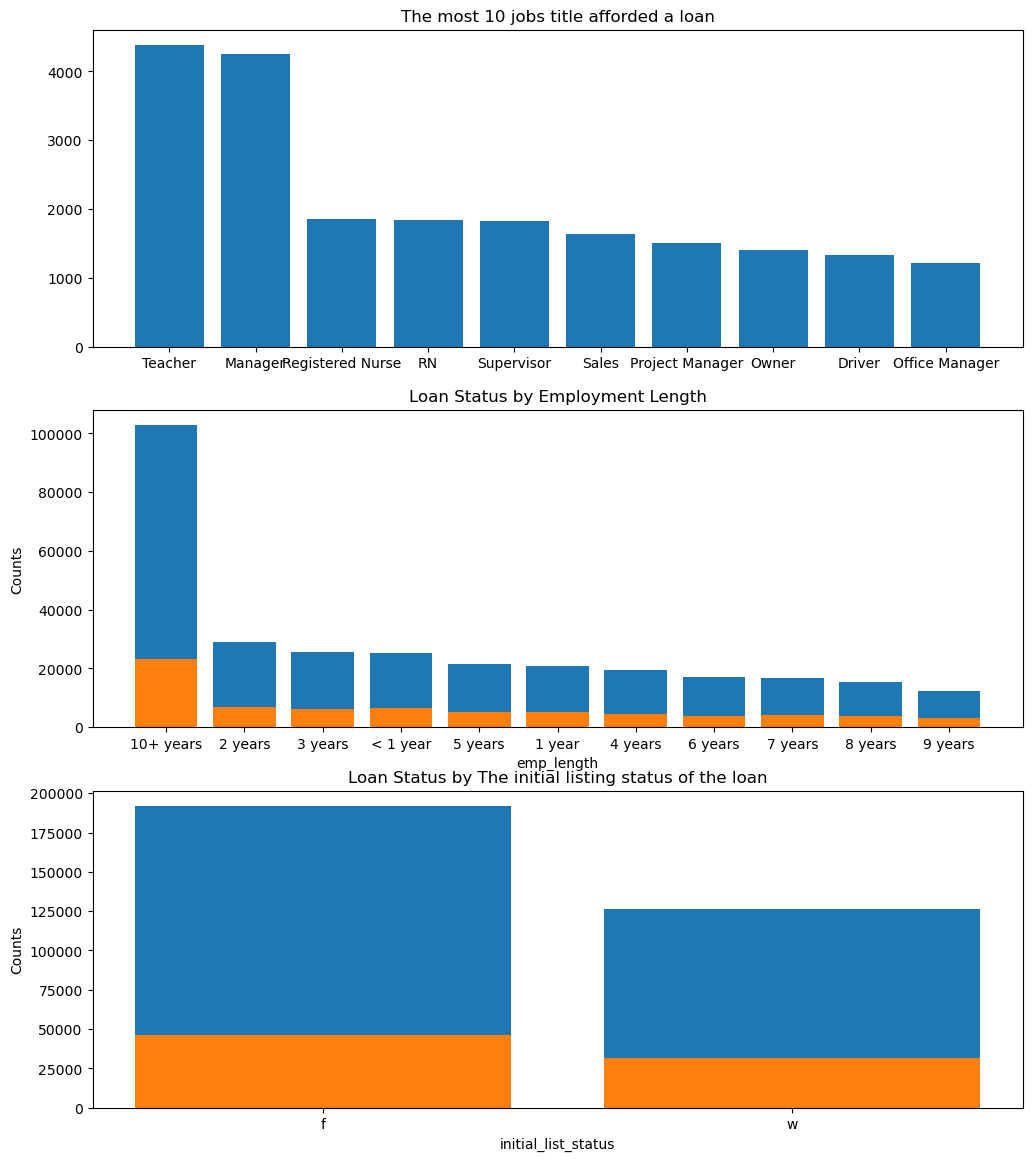

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

empTitle = df["emp_title"].value_counts()[:10]
axes[0].bar(x=empTitle.index, height=empTitle.values)
axes[0].set(title="The most 10 jobs title afforded a loan")


fullyPaid1 = df.loc[df["loan_status"] == "Fully Paid", "emp_length"].value_counts()
chargedOff1 = df.loc[df["loan_status"] == "Charged Off", "emp_length"].value_counts()

axes[1].bar(x=fullyPaid1.index, height=fullyPaid1.values)
axes[1].bar(x=chargedOff1.index, height=chargedOff1.values)
axes[1].set(
    title="Loan Status by Employment Length", ylabel="Counts", xlabel="emp_length"
)


fullyPaid2 = df.loc[
    df["loan_status"] == "Fully Paid", "initial_list_status"
].value_counts()
chargedOff2 = df.loc[
    df["loan_status"] == "Charged Off", "initial_list_status"
].value_counts()

axes[2].bar(x=fullyPaid2.index, height=fullyPaid2.values)
axes[2].bar(x=chargedOff2.index, height=chargedOff2.values)
axes[2].set(
    title="Loan Status by The initial listing status of the loan",
    ylabel="Counts",
    xlabel="initial_list_status",
)


### The correlation between the numeric metrics and `loan_status`

In [49]:
df["loan_statusToNum"] = df.loan_status.map({"Fully Paid": 1, "Charged Off": 0})
df.loan_statusToNum


0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_statusToNum, Length: 396030, dtype: int64